## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview

merge_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
number_of_mice = len(merge_data["Mouse ID"].unique())

print(f"Number of mice = {number_of_mice}")

Number of mice = 249


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merge_data.loc[merge_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()

duplicate_mice

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
final_mice_df = merge_data[merge_data["Mouse ID"].isin(duplicate_mice) == False]

final_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
final_mouse_count = len(final_mice_df["Mouse ID"].unique())

print(f"Number of mice = {final_mouse_count}")

Number of mice = 248


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summary_df = final_mice_df.loc[:, ["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]]

# This method is the most straighforward, creating multiple series and putting them all together at the end.

#mean
mean = summary_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
# median
median = summary_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
#variance
variance = summary_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
#standard deviation
sd = summary_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
#sem
sem = summary_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
#combine data
analysis_df = pd.DataFrame({"mean tumor volume":mean,"median tumor volume":median,"variance":variance, "SD": sd, "SEM": sem})

analysis_df

,mean tumor volume,median tumor volume,variance,SD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
group_data = merge_data.groupby(["Drug Regimen"]).count()["Mouse ID"]
# This method produces everything in a single groupby function
group_data

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

## Bar and Pie Charts

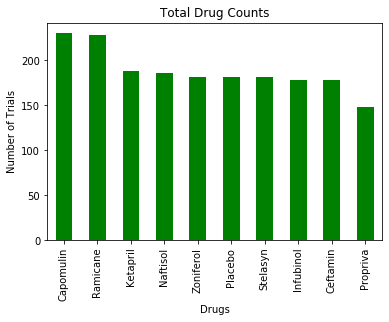

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
drug_bar = final_mice_df["Drug Regimen"].value_counts()
drug_bar.plot(kind = "bar", facecolor ="green")
y_axis = drug_bar.values
x_axis = drug_bar.index
plt.ylabel("Number of Trials")
plt.xlabel("Drugs")
plt.title("Total Drug Counts")
plt.xticks(rotation=90)

plt.show()

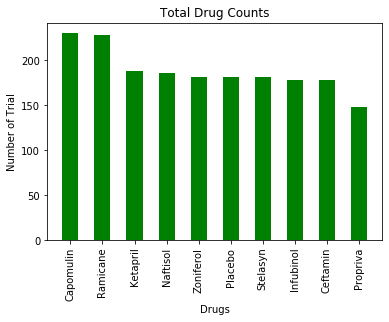

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
drug_bar = final_mice_df["Drug Regimen"].value_counts()
y_axis = drug_bar.values
x_axis = np.arange(0,len(y_axis),1)
x_drugs = drug_bar.index
plt.bar(x_drugs, y_axis, color = "green", align = "center", width= .5)
plt.ylabel("Number of Trial")
plt.xlabel("Drugs")
plt.title("Total Drug Counts")
plt.xticks(rotation=90)

plt.show()

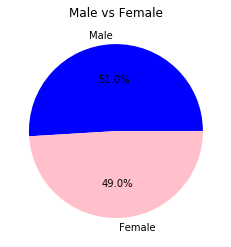

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = final_mice_df["Sex"].value_counts()
labels = gender.index 
sizes = gender.values
colors = ["blue", "pink"]
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%")
plt.title("Male vs Female")

plt.show()

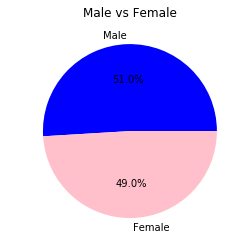

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = final_mice_df["Sex"].value_counts()
labels = gender.values
sizes = gender.values
colors = ["blue", "pink"]
gender.plot(kind = "pie", colors = colors, autopct ="%1.1f%%")
plt.title("Male vs Female")
plt.ylabel(" ")

plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 

# Capomulin, Ramicane, Infubinol, and Ceftamin

capomulin = merge_data.loc[merge_data["Drug Regimen"] == "Capomulin",:]
ramicane = merge_data.loc[merge_data["Drug Regimen"] == "Ramicane", :]
infubinol = merge_data.loc[merge_data["Drug Regimen"] == "Infubinol", :]
ceftamin = merge_data.loc[merge_data["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse

# Capomulin
capomulin_final = capomulin.groupby("Mouse ID").max()["Timepoint"]
capomulin_final_vol = pd.DataFrame(capomulin_final)
capomulin_final_df = pd.merge(capomulin_final_vol, merge_data, on=("Mouse ID","Timepoint"),how="left")

capomulin_tumor = capomulin_final_df["Tumor Volume (mm3)"]

quartiles = capomulin_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Capomulin outliers can be below {lower_bound} and above {upper_bound}.")

# Ramicane
ramicane_final = ramicane.groupby("Mouse ID").max()["Timepoint"]
ramicane_final_vol = pd.DataFrame(ramicane_final)
ramicane_final_df = pd.merge(ramicane_final_vol, merge_data, on=("Mouse ID","Timepoint"),how="left")

ramicane_tumor = ramicane_final_df["Tumor Volume (mm3)"]

quartiles2 = ramicane_tumor.quantile([.25,.5,.75])
lowerq2 = quartiles2[0.25]
upperq2 = quartiles2[0.75]
iqr2 = upperq2-lowerq2

lower_bound2 = lowerq2 - (1.5*iqr2)
upper_bound2 = upperq2 + (1.5*iqr2)
print(f"Ramicane outliers can be below {lower_bound2} and above {upper_bound2}.")

#Infubinol
infubinol_final = infubinol.groupby("Mouse ID").max()["Timepoint"]
infubinol_final_vol = pd.DataFrame(infubinol_final)
infubinol_final_df = pd.merge(infubinol_final_vol, merge_data, on=("Mouse ID","Timepoint"),how="left")

infubinol_tumor = infubinol_final_df["Tumor Volume (mm3)"]

quartiles3 = infubinol_tumor.quantile([.25,.5,.75])
lowerq3 = quartiles3[0.25]
upperq3 = quartiles3[0.75]
iqr3 = upperq3-lowerq3

lower_bound3 = lowerq3 - (1.5*iqr3)
upper_bound3 = upperq3 + (1.5*iqr3)

lower_bound3 = lowerq3 - (1.5*iqr3)
upper_bound3 = upperq3 + (1.5*iqr3)
print(f"Infubinol outliers can be below {lower_bound3} and above {upper_bound3}.")

# Ceftamin

ceftamin_final = ceftamin.groupby("Mouse ID").max()["Timepoint"]
ceftamin_final_vol = pd.DataFrame(ceftamin_final)
ceftamin_final_df = pd.merge(ceftamin_final_vol, merge_data, on=("Mouse ID","Timepoint"),how="left")

ceftamin_tumor = ceftamin_final_df["Tumor Volume (mm3)"]

quartiles4 = ceftamin_tumor.quantile([.25,.5,.75])
lowerq4 = quartiles4[0.25]
upperq4 = quartiles4[0.75]
iqr4 = upperq4-lowerq4

lower_bound4 = lowerq4 - (1.5*iqr4)
upper_bound4 = upperq4 + (1.5*iqr4)
print(f"Ceftamin outliers can be below {lower_bound4} and above {upper_bound4}")

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


Capomulin outliers can be below 20.70456164999999 and above 51.83201549.
Ramicane outliers can be below 17.912664470000003 and above 54.30681135.
Infubinol outliers can be below 36.83290494999999 and above 82.74144559000001.
Ceftamin outliers can be below 25.355449580000002 and above 87.66645829999999


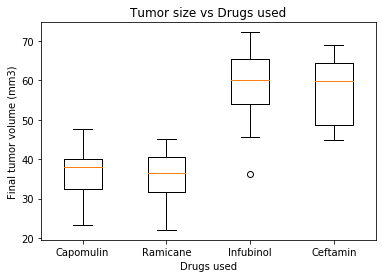

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
box_plot_data = [capomulin_tumor, ramicane_tumor, infubinol_tumor, ceftamin_tumor]
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor size vs Drugs used')
ax1.set_ylabel('Final tumor volume (mm3)')
ax1.set_xlabel('Drugs used')
ax1.boxplot(box_plot_data, labels=["Capomulin","Ramicane","Infubinol","Ceftamin",])


plt.show()

## Line and Scatter Plots

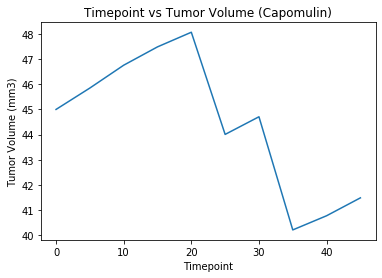

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin = final_mice_df.loc[final_mice_df['Drug Regimen'] == 'Capomulin']
mouse_id = final_mice_df.loc[final_mice_df['Mouse ID'] == 'l509']
plt.plot(mouse_id["Timepoint"], mouse_id["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Timepoint vs Tumor Volume (Capomulin)")

plt.show()

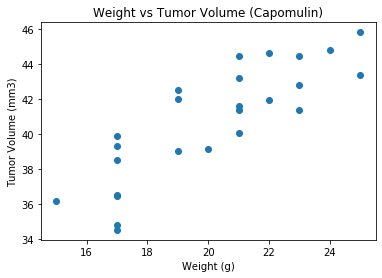

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin = final_mice_df.loc[final_mice_df['Drug Regimen'] == 'Capomulin']
capomulin_avg = capomulin.groupby(["Mouse ID"]).mean()
plt.scatter(capomulin_avg["Weight (g)"],capomulin_avg["Tumor Volume (mm3)"] )
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume (Capomulin)")

plt.show()

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr = round(st.pearsonr(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])[0],2)
print(f"correlation for weight vs tumor volume is {corr}")
correlation_line = st.linregress(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])

correlation_line

correlation for weight vs tumor volume is 0.84


LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)

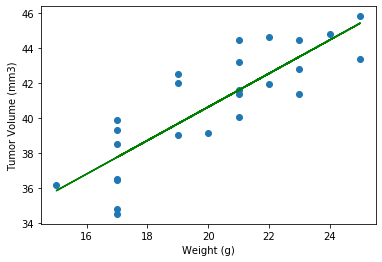

In [19]:
mslope = 0.9544396890241045
intercept = 21.552160532685015
y_values = capomulin_avg['Weight (g)']*mslope+intercept
plt.scatter(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])
plt.plot(capomulin_avg['Weight (g)'],y_values,color = "green")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()